In [123]:
%reload_ext autoreload
%autoreload 2

from npfd import data
from npfd.data.htk import read_data
from npfd import visualization as viz
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

## Make dataset

- Leo los datos crudos que salen de el modelo MALTE/UHMA.
- Los datos crudos se convierten de cm3 a dndlogdp. 
- El periodo es de 10 minutos. 
- Se agregan etiquetas de forma automática.
- Cada archivo tiene un día. 
- Ese dia puede o puede no tener un evento de FNP.
- Separo 90% para entrenar, 10% para testear

In [106]:
params = {  'normalize': True,
            'data_version': '2',
                                      
            # Labels
            'label_type': 'event-noevent',
            'nuc_threshold': 0.15,        # 1/cm3/10min
            'pos_vol_threshold': 200,     # 1/m3^3/10min
            'neg_vol_threshold': -5000,    # 1/cm3/10min
       }  

params['raw_data_source'] = 'simulation'
X_train, X_test, y_train, y_test = data.dataset.make_dataset(params, clean_interim_dir=False)

INFO:root:Converting simulation raw files to HTK format ...
INFO:root:Generating script (.scp) files...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Adding deltas and acelerations...
INFO:root:Test files:	546
INFO:root:Train files:	4512


## Leo un archivo

In [125]:
fi = '/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/data/../../data/interim/train_D_A' + f'/20170302'

_, obs, delta, acc = read_data(fi)

## Grafico el archivo

[Text(1, 0, '1'),
 Text(1, 0, '10'),
 Text(1, 0, '100'),
 Text(1, 0, '1000'),
 Text(1, 0, '10000')]

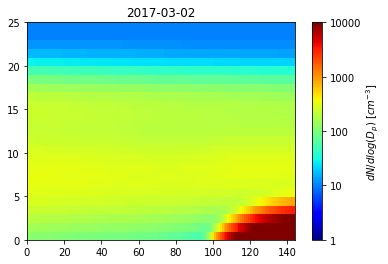

In [137]:
plt.pcolor(obs.values[::1, ::1].T, cmap='jet')
cbar = plt.colorbar(ticks=[0,1,2,3,4])
plt.clim(0, 4)
plt.title(pd.to_datetime(fi[-8:]).strftime('%Y-%m-%d'))
cbar.set_label(label=r'$dN/dlog(D_p) \ [cm^{-3}]$')
cbar.ax.set_yticklabels(['1', '10', '100', '1000', '10000'])

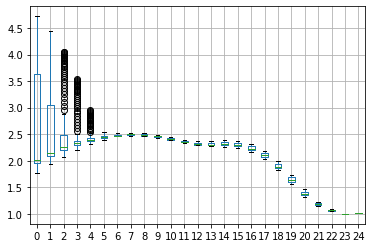

In [120]:
obs.boxplot()

In [126]:
obs

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,2.07,2.19,2.29,2.38,2.45,2.49,2.52,2.53,2.52,2.49,...,2.38,2.32,2.19,1.99,1.73,1.46,1.23,1.10,1.0,1.01
1,2.07,2.19,2.29,2.38,2.45,2.49,2.52,2.53,2.52,2.48,...,2.38,2.32,2.19,1.99,1.73,1.46,1.23,1.10,1.0,1.01
2,2.07,2.19,2.29,2.38,2.44,2.49,2.52,2.53,2.51,2.48,...,2.38,2.32,2.19,1.99,1.73,1.46,1.23,1.09,1.0,1.01
3,2.06,2.19,2.29,2.38,2.44,2.49,2.52,2.53,2.51,2.48,...,2.38,2.32,2.19,1.99,1.73,1.46,1.23,1.09,1.0,1.01
4,2.06,2.18,2.29,2.38,2.44,2.49,2.52,2.52,2.51,2.48,...,2.38,2.32,2.19,1.99,1.73,1.45,1.23,1.09,1.0,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,4.70,4.41,4.00,3.47,2.88,2.51,2.46,2.49,2.50,2.47,...,2.24,2.17,2.03,1.83,1.58,1.32,1.14,1.05,1.0,1.01
140,4.71,4.42,4.01,3.48,2.90,2.52,2.46,2.49,2.50,2.47,...,2.24,2.17,2.03,1.83,1.58,1.32,1.14,1.05,1.0,1.01
141,4.71,4.43,4.03,3.50,2.92,2.52,2.47,2.49,2.50,2.47,...,2.24,2.17,2.03,1.83,1.57,1.32,1.14,1.05,1.0,1.01
142,4.72,4.44,4.04,3.52,2.94,2.53,2.47,2.49,2.50,2.47,...,2.24,2.17,2.03,1.83,1.57,1.32,1.14,1.05,1.0,1.01
